In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:


#download file from Cloud object storage
Bucket='****'
client_****.download_file(Bucket,Key='DataFromNoteBookQ2_cos.pkl',Filename='./DataFromNoteBookQ2_local.pkl')

df_complaints = pd.read_pickle('./DataFromNoteBookQ2_local.pkl')
df_complaints.tail()


created_date  unique_key incident_zip       incident_address  \
5643992 2018-12-30 05:59:21    41344560        10459     1050 LOWELL STREET   
5644037 2018-12-31 22:41:54    41344749        10467  3225 OLINVILLE AVENUE   
5646658 2018-12-31 19:28:48    41359636        10472  1725 EAST  172 STREET   
5647932 2018-12-31 19:24:07    41365381        10473    880 THIERIOT AVENUE   
5650318 2018-12-13 13:22:23    41376105        10453    69 WEST  182 STREET   

              street_name borough             latitude            longitude  \
5643992     LOWELL STREET   BRONX               40.826              -73.887   
5644037  OLINVILLE AVENUE   BRONX               40.872              -73.868   
5646658  EAST  172 STREET   BRONX               40.832              -73.870   
5647932   THIERIOT AVENUE   BRONX               40.823              -73.862   
5650318  WEST  182 STREET   BRONX               40.858              -73.907   

                closed_date                delay  created_year  created_month  
5643992 2019-01-04 15:10:29              129.000          2018             12  
5644037 2019-01-04 02:05:28               75.000          2018             12  
5646658 2019-01-07 10:50:37              159.000          2018             12  
5647932 2019-01-07 10:05:20              158.000          2018             12  
5650318 2019-01-08 18:38:07              629.000          2018             12

Please note all the modifications we have done previously to the complaints dataframe.

   We are considering only Heating complaints
   
   We are considering complaints from the Bronx borough
   
   We have removed data older than 2014 and from 2019
   
   We have removed columns that don't add value
   
   We have included a column with the average delay to close complaints
   
   We have included columns with the year and month of creation of each complaint
   
   We removed duplicate complaints (complaints which included the word duplicate in their description)
   
   

In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Borough  Block  Lot   CD               CT2010               CB2010  \
0      BX   2260    1  201               19.000            1,022.000   
1      BX   2260    4  201               19.000            1,022.000   
2      BX   2260   10  201               19.000            1,022.000   
3      BX   2260   17  201               19.000            1,022.000   
4      BX   2260   18  201               19.000            1,022.000   

            SchoolDist              Council              ZipCode FireComp  \
0                7.000                8.000           10,454.000     L029   
1                7.000                8.000           10,454.000     L029   
2                7.000                8.000           10,454.000     L029   
3                7.000                8.000           10,454.000     L029   
4                7.000                8.000           10,454.000     L029   

            PolicePrct  HealthCenterDistrict           HealthArea  \
0               40.000                23.000            4,700.000   
1               40.000                23.000            4,700.000   
2               40.000                23.000            4,700.000   
3               40.000                23.000            4,700.000   
4               40.000                23.000            4,700.000   

             SanitBoro        SanitDistrict SanitSub                 Address  \
0                2.000                1.000       2A  122 BRUCKNER BOULEVARD   
1                2.000                1.000       2A  126 BRUCKNER BOULEVARD   
2                2.000                1.000       2A  138 BRUCKNER BOULEVARD   
3                2.000                1.000       2A  144 BRUCKNER BOULEVARD   
4                2.000                1.000       2A  148 BRUCKNER BOULEVARD   

  ZoneDist1 ZoneDist2 ZoneDist3 ZoneDist4 Overlay1 Overlay2 SPDist1  \
0  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   
1  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   
2  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   
3  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   
4  M1-5/R8A       NaN       NaN       NaN      NaN      NaN    MX-1   

               SPDist2              SPDist3            LtdHeight SplitZone  \
0                  nan                  nan                  nan         N   
1                  nan                  nan                  nan         N   
2                  nan                  nan                  nan         N   
3                  nan                  nan                  nan         N   
4                  nan                  nan                  nan         N   

  BldgClass              LandUse  Easements OwnerType              OwnerName  \
0        Z9                  nan          0       NaN  122 BRUCKNER PARTNERS   
1        G5                7.000          0       NaN  24 INDIAN HEAD HOLDIN   
2        F5                6.000          0         P            ANJOST CORP   
3        C1                2.000          0       NaN       144 BRUCKNER LLC   
4        C7                2.000          0         P       148 BRUCKNER LLC   

   LotArea  BldgArea  ComArea  ResArea  OfficeArea  RetailArea  GarageArea  \
0    15000         0        0        0           0           0           0   
1    13770       752      752        0         272           0           0   
2    35000     39375    39375        0           0           0           0   
3     2500     12500        0    12500           0           0           0   
4     1875      8595     1719     6876           0        1719           0   

   StrgeArea  FactryArea  OtherArea  AreaSource  NumBldgs  \
0          0           0          0           7         1   
1        480           0          0           2         2   
2          0       39375          0           2         1   
3          0           0          0           2         1   
4          0           0          0           2         1  

In [4]:
df_pluto.shape

(89854, 87)

In [5]:
#Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.
columns=['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
         'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'YCoord', 'XCoord']
df_pluto2=df_pluto[columns]
df_pluto2.shape

(89854, 19)

In [6]:
#in order to merge both datasets, we group the first by address:
df_heat_addr = df_complaints.groupby(['incident_address','latitude','longitude','incident_zip'],as_index=False).\
    agg({"unique_key":"count","delay":"mean"}) 
df_heat_addr.columns = ["addr","lat","lng","zip","amount","av_delay"]
df_comp_addr = df_heat_addr[df_heat_addr['amount']>0][['addr','lat','lng','zip', 'amount','av_delay']].sort_values(by='amount', ascending=False)
df_comp_addr.head()


addr                  lat  \
12825             3810 BAILEY AVENUE               40.884   
269              1025 BOYNTON AVENUE               40.825   
18150            888 GRAND CONCOURSE               40.827   
6726             2074 WALLACE AVENUE               40.853   
5630   1841 DR M L KING JR BOULEVARD               40.852   

                       lng    zip  amount             av_delay  
12825              -73.898  10463    3681               38.444  
269                -73.877  10472    1464               29.378  
18150              -73.923  10451     833               92.289  
6726               -73.865  10462     610               53.484  
5630               -73.914  10453     531               65.646

In [7]:
left_merge=pd.merge(df_pluto2,df_comp_addr,left_on='Address',right_on='addr',how='left',indicator=True)
left_merge.shape

(90657, 26)

In [8]:
left_merge.head()

Address  BldgArea            BldgDepth             BuiltFAR  \
0  122 BRUCKNER BOULEVARD         0                0.000                0.000   
1  126 BRUCKNER BOULEVARD       752               16.000                0.050   
2  138 BRUCKNER BOULEVARD     39375              200.000                1.130   
3  144 BRUCKNER BOULEVARD     12500               85.000                5.000   
4  148 BRUCKNER BOULEVARD      8595               70.000                4.580   

               CommFAR             FacilFAR  Lot  LotArea  \
0                5.000                6.500    1    15000   
1                5.000                6.500    4    13770   
2                5.000                6.500   10    35000   
3                5.000                6.500   17     2500   
4                5.000                6.500   18     1875   

              LotDepth  NumBldgs            NumFloors  OfficeArea  ResArea  \
0              200.000         1                0.000           0        0   
1              100.000         2                1.000         272        0   
2              200.000         1                2.000           0        0   
3              100.000         1                5.000           0    12500   
4               75.000         1                5.000           0     6876   

              ResidFAR  RetailArea  YearBuilt  YearAlter1  \
0                6.020           0          0           0   
1                6.020           0       1931        1994   
2                6.020           0       1931           0   
3                6.020           0       1931        2001   
4                6.020        1719       1920        2009   

                YCoord               XCoord                    addr  \
0          232,162.000        1,005,957.000                     NaN   
1          232,156.000        1,006,076.000                     NaN   
2          232,036.000        1,006,187.000                     NaN   
3          232,033.000        1,006,299.000  144 BRUCKNER BOULEVARD   
4          232,040.000        1,006,363.000  148 BRUCKNER BOULEVARD   

                   lat                  lng    zip               amount  \
0                  nan                  nan    NaN                  nan   
1                  nan                  nan    NaN                  nan   
2                  nan                  nan    NaN                  nan   
3               40.804              -73.920  10454                2.000   
4               40.804              -73.920  10454                2.000   

              av_delay     _merge  
0                  nan  left_only  
1                  nan  left_only  
2                  nan  left_only  
3              130.000       both  
4               60.000       both

In [9]:
left_merge['amount']=left_merge['amount'].fillna(0) #fill missing values with 0

In [10]:
left_merge.head()

Address  BldgArea            BldgDepth             BuiltFAR  \
0  122 BRUCKNER BOULEVARD         0                0.000                0.000   
1  126 BRUCKNER BOULEVARD       752               16.000                0.050   
2  138 BRUCKNER BOULEVARD     39375              200.000                1.130   
3  144 BRUCKNER BOULEVARD     12500               85.000                5.000   
4  148 BRUCKNER BOULEVARD      8595               70.000                4.580   

               CommFAR             FacilFAR  Lot  LotArea  \
0                5.000                6.500    1    15000   
1                5.000                6.500    4    13770   
2                5.000                6.500   10    35000   
3                5.000                6.500   17     2500   
4                5.000                6.500   18     1875   

              LotDepth  NumBldgs            NumFloors  OfficeArea  ResArea  \
0              200.000         1                0.000           0        0   
1              100.000         2                1.000         272        0   
2              200.000         1                2.000           0        0   
3              100.000         1                5.000           0    12500   
4               75.000         1                5.000           0     6876   

              ResidFAR  RetailArea  YearBuilt  YearAlter1  \
0                6.020           0          0           0   
1                6.020           0       1931        1994   
2                6.020           0       1931           0   
3                6.020           0       1931        2001   
4                6.020        1719       1920        2009   

                YCoord               XCoord                    addr  \
0          232,162.000        1,005,957.000                     NaN   
1          232,156.000        1,006,076.000                     NaN   
2          232,036.000        1,006,187.000                     NaN   
3          232,033.000        1,006,299.000  144 BRUCKNER BOULEVARD   
4          232,040.000        1,006,363.000  148 BRUCKNER BOULEVARD   

                   lat                  lng    zip               amount  \
0                  nan                  nan    NaN                0.000   
1                  nan                  nan    NaN                0.000   
2                  nan                  nan    NaN                0.000   
3               40.804              -73.920  10454                2.000   
4               40.804              -73.920  10454                2.000   

              av_delay     _merge  
0                  nan  left_only  
1                  nan  left_only  
2                  nan  left_only  
3              130.000       both  
4               60.000       both

In [11]:
print(left_merge.dtypes)

Address         object
BldgArea         int64
BldgDepth      float64
BuiltFAR       float64
CommFAR        float64
FacilFAR       float64
Lot              int64
LotArea          int64
LotDepth       float64
NumBldgs         int64
NumFloors      float64
OfficeArea       int64
ResArea          int64
ResidFAR       float64
RetailArea       int64
YearBuilt        int64
YearAlter1       int64
YCoord         float64
XCoord         float64
addr            object
lat            float64
lng            float64
zip             object
amount         float64
av_delay       float64
_merge        category
dtype: object


In [12]:
#convert relevant datatypes to integers
left_merge[['NumFloors']]=left_merge[['NumFloors']].astype(int)
left_merge[['amount']]=left_merge[['amount']].astype(int)

We add one additional feature which could be of interest. The year the house was last altered. That is the maximum of Year Built and Year Alter1

In [13]:
left_merge['last_improvement']=left_merge[['YearBuilt','YearAlter1']].max(axis=1)
#df["C"] = df[["A", "B"]].max(axis=1)

In [14]:
left_merge.describe()

BldgArea            BldgDepth             BuiltFAR  \
count           90,657.000           90,657.000           90,657.000   
mean             8,490.647               48.584                1.129   
std             66,048.823               31.595                1.811   
min                  0.000                0.000                0.000   
25%              1,600.000               35.000                0.560   
50%              2,241.000               45.000                0.860   
75%              3,312.000               56.000                1.270   
max         13,540,113.000            1,300.000              259.800   

                   CommFAR             FacilFAR                  Lot  \
count           90,657.000           90,657.000           90,657.000   
mean                 0.131                2.872              112.552   
std                  0.575                1.615              477.554   
min                  0.000                0.000                1.000   
25%                  0.000                2.000               20.000   
50%                  0.000                2.000               41.000   
75%                  0.000                4.800               73.000   
max                  9.000               10.000            9,978.000   

                   LotArea             LotDepth             NumBldgs  \
count           90,657.000           90,657.000           90,657.000   
mean            10,291.368              106.077                1.185   
std            304,527.973               73.860                1.930   
min                  0.000                0.000                0.000   
25%              2,200.000               95.000                1.000   
50%              2,517.000              100.000                1.000   
75%              4,325.000              102.670                1.000   
max         74,250,000.000            8,000.000              251.000   

                 NumFloors           OfficeArea              ResArea  \
count           90,657.000           90,657.000           90,657.000   
mean                 2.245              505.558            6,083.742   
std                  1.542           11,923.323           57,513.569   
min                  0.000                0.000                0.000   
25%                  2.000                0.000            1,152.000   
50%                  2.000                0.000            1,776.000   
75%                  3.000                0.000            2,646.000   
max                 44.000        1,311,800.000       13,211,398.000   

                  ResidFAR           RetailArea            YearBuilt  \
count           90,657.000           90,657.000           90,657.000   
mean                 1.692              354.335            1,806.836   
std                  1.325            4,895.375              497.422   
min                  0.000                0.000                0.000   
25%                  0.900                0.000            1,920.000   
50%                  1.100                0.000            1,931.000   
75%                  2.430                0.000            1,960.000   
max                 10.000          598,908.000            2,017.000   

                YearAlter1               YCoord               XCoord  \
count           90,657.000           87,396.000           87,396.000   
mean               180.351          249,944.970        1,021,599.859   
std                572.537            9,761.946            8,624.886   
min                  0.000          227,527.000        1,002,677.000   
25%                  0.000          241,911.000        1,014,138.000   
50%                  0.000          248,558.000        1,023,249.000   
75%                  0.000          257,976.000        1,027,088.000   
max              2,017.000          272,275.000        1,047,777.000   

                       lat                  lng               amount  \
count           14,220.000           14,220.000     

For us the target (dependant) variable Y is the Amount (of complaints), the independant variables X are all the rest
We now run Pearson's correlation to find  eventual relationships

In [15]:
left_merge.corr()

BldgArea            BldgDepth  \
BldgArea                        1.000                0.249   
BldgDepth                       0.249                1.000   
BuiltFAR                        0.284                0.294   
CommFAR                         0.039                0.154   
FacilFAR                        0.099                0.286   
Lot                             0.082               -0.009   
LotArea                         0.168                0.026   
LotDepth                        0.230                0.207   
NumBldgs                        0.539                0.090   
NumFloors                       0.363                0.436   
OfficeArea                      0.227                0.185   
ResArea                         0.894                0.144   
ResidFAR                        0.093                0.243   
RetailArea                      0.165                0.198   
YearBuilt                       0.033                0.419   
YearAlter1                      0.099                0.271   
YCoord                         -0.020               -0.087   
XCoord                         -0.076               -0.232   
lat                            -0.022               -0.087   
lng                            -0.146               -0.273   
amount                          0.070                0.142   
av_delay                       -0.041               -0.057   
last_improvement                0.035                0.426   

                             BuiltFAR              CommFAR  \
BldgArea                        0.284                0.039   
BldgDepth                       0.294                0.154   
BuiltFAR                        1.000                0.021   
CommFAR                         0.021                1.000   
FacilFAR                        0.268                0.217   
Lot                             0.099                0.007   
LotArea                        -0.006                0.010   
LotDepth                       -0.015                0.095   
NumBldgs                        0.091               -0.014   
NumFloors                       0.470               -0.059   
OfficeArea                      0.042                0.050   
ResArea                         0.275               -0.010   
ResidFAR                        0.281                0.056   
RetailArea                      0.340                0.129   
YearBuilt                       0.161               -0.121   
YearAlter1                      0.157                0.111   
YCoord                         -0.061               -0.143   
XCoord                         -0.214               -0.185   
lat                            -0.076               -0.083   
lng                            -0.272               -0.104   
amount                          0.151               -0.008   
av_delay                       -0.056                0.033   
last_improvement                0.166               -0.117   

                             FacilFAR                  Lot  \
BldgArea                        0.099                0.082   
BldgDepth                       0.286               -0.009   
BuiltFAR                        0.268                0.099   
CommFAR                         0.217                0.007   
FacilFAR                        1.000               -0.020   
Lot                            -0.020                1.000   
LotArea                        -0.014                0.008   
LotDepth                       -0.015                0.034   
NumBldgs                       -0.029                0.093   
NumFloors                       0.316                0.093   
OfficeArea                      0.041                0.018   
ResArea                         0.088                0.077   
ResidFAR                        0.850               -0.005   
RetailArea                      0.079                0.076   
YearBuilt                      -0.006               -0.033   
YearAlter1                      0.179               -0.008 

We can see how there are no features that show any strong linear relationship with the amount of compalints. The bigger one being the Number of Floors (Pearson coeff of 0.216). There could be however other types of correlation.

Let us do a profiling of our Merged data Frame to find data characteristics, posible improvements and eventual relationships

In [16]:
#cell included for trials with fewer rows and thus shorter computing times
#left_merge_short=left_merge[left_merge['zip'].isin(['10468','10458','10453','10454','10451','10467','10462','10461'])]
#df_ht_complaint_recent = df_ht_complaint[df_ht_complaint['created_year'].isin(['2017','2018'])]
#left_merge_short.shape

In [17]:
!pip install pandas-profiling

In [18]:
import pandas_profiling
p = pandas_profiling.ProfileReport(left_merge)
p

We can see several findings:

    -there are columns we can drop since they are not useful for our purpose
    
    -There are no clear linear relationships between the independent variables and the amount of complaints
    
    -However, there are several features that show show level of correlation using Spearman Correlation Method
    

In [19]:
left_merge.drop(['YCoord','XCoord','addr','_merge'],axis=1,inplace=True)

print('remove unnecesary columns.Shape=',left_merge.shape)



remove unnecesary columns.Shape= (90657, 23)


In [20]:
#let's see the actual values of the Spearman correlations (amount column)
left_merge.corr('spearman')

BldgArea            BldgDepth  \
BldgArea                        1.000                0.787   
BldgDepth                       0.787                1.000   
BuiltFAR                        0.764                0.651   
CommFAR                         0.072                0.078   
FacilFAR                        0.362                0.346   
Lot                            -0.040               -0.069   
LotArea                         0.365                0.275   
LotDepth                        0.136                0.168   
NumBldgs                        0.170                0.178   
NumFloors                       0.595                0.431   
OfficeArea                      0.191                0.168   
ResArea                         0.653                0.505   
ResidFAR                        0.350                0.324   
RetailArea                      0.277                0.264   
YearBuilt                       0.190                0.126   
YearAlter1                      0.279                0.239   
lat                            -0.068               -0.099   
lng                            -0.447               -0.368   
amount                          0.401                0.366   
av_delay                       -0.103               -0.089   
last_improvement                0.314                0.235   

                             BuiltFAR              CommFAR  \
BldgArea                        0.764                0.072   
BldgDepth                       0.651                0.078   
BuiltFAR                        1.000               -0.040   
CommFAR                        -0.040                1.000   
FacilFAR                        0.441                0.174   
Lot                            -0.053                0.006   
LotArea                        -0.153                0.174   
LotDepth                       -0.103                0.075   
NumBldgs                        0.031               -0.091   
NumFloors                       0.721               -0.169   
OfficeArea                      0.100                0.166   
ResArea                         0.637               -0.249   
ResidFAR                        0.476               -0.178   
RetailArea                      0.191                0.158   
YearBuilt                       0.208               -0.065   
YearAlter1                      0.187                0.110   
lat                            -0.125               -0.084   
lng                            -0.494               -0.090   
amount                          0.421               -0.039   
av_delay                       -0.094                0.026   
last_improvement                0.304               -0.023   

                             FacilFAR                  Lot  \
BldgArea                        0.362               -0.040   
BldgDepth                       0.346               -0.069   
BuiltFAR                        0.441               -0.053   
CommFAR                         0.174                0.006   
FacilFAR                        1.000               -0.075   
Lot                            -0.075                1.000   
LotArea                         0.010               -0.016   
LotDepth                       -0.005                0.029   
NumBldgs                       -0.111               -0.054   
NumFloors                       0.294               -0.008   
OfficeArea                      0.105               -0.037   
ResArea                         0.209                0.013   
ResidFAR                        0.810               -0.075   
RetailArea                      0.225               -0.069   
YearBuilt                      -0.101                0.094   
YearAlter1                      0.168               -0.042   
lat                            -0.284                0.058   
lng                            -0.680               -0.048   
amount                          0.293               -0.055   
av_delay                       -0.032                0.020 

We can see that there are very weak relationships when we search for linear regression. However, when we compute Spearman coefficient, relationships are stronger for some features: Residential Area (0.43), Built Floor to Area Ratio (0.421), Building Area (0.401), Number of Floors (0.396) and Building Depth(0.366).

Additional insight: We investigated the effect of the year the building was last improved (maximum of the Year the building was built or in which it was altered) and found no relationship. Equally we found that the house features had no relationship whatsoever with the delay to close complaints

Let's now take a look at some scatter plots to see how the strongest relationships between features and amount of complaints look like.

Let's investigate the relationship between the Residential Area and the amount of complaints

In [21]:
from scipy import stats
from scipy.stats import spearmanr

The Pearson Correlation Coefficient is 0.0819816642472748  with a P-value of P = 5.704339037902867e-135
The Spearman Correlation Coefficient is 0.4300642607633607  with a P-value of P = 0.0


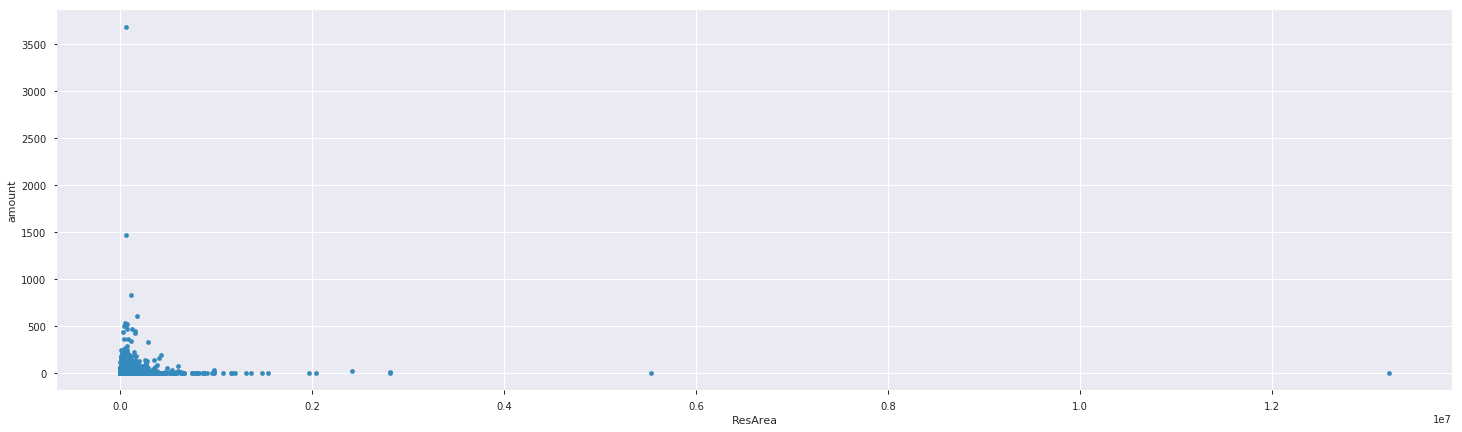

In [22]:
#Let's calculate the  Pearson and Spearman Correlation Coefficients and P-value of 'Residential Area' and 'amount of complaints'. 
pearson_coef, p_value = stats.pearsonr(left_merge['ResArea'], left_merge['amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

corr, p_value2 = spearmanr(left_merge['ResArea'], left_merge['amount'])
print ("The Spearman Correlation Coefficient is",corr," with a P-value of P =", p_value2 )

#df_grp_BldgDepth.info()
left_merge.plot(kind='scatter',x='ResArea',y='amount',figsize=(25,7))

Let's investigate the relationship between the Built Floor Area Ratio and the amount of complaints

The Pearson Correlation Coefficient is 0.15072116968829646  with a P-value of P = 0.0
The Spearman Correlation Coefficient is 0.420941668170137  with a P-value of P = 0.0


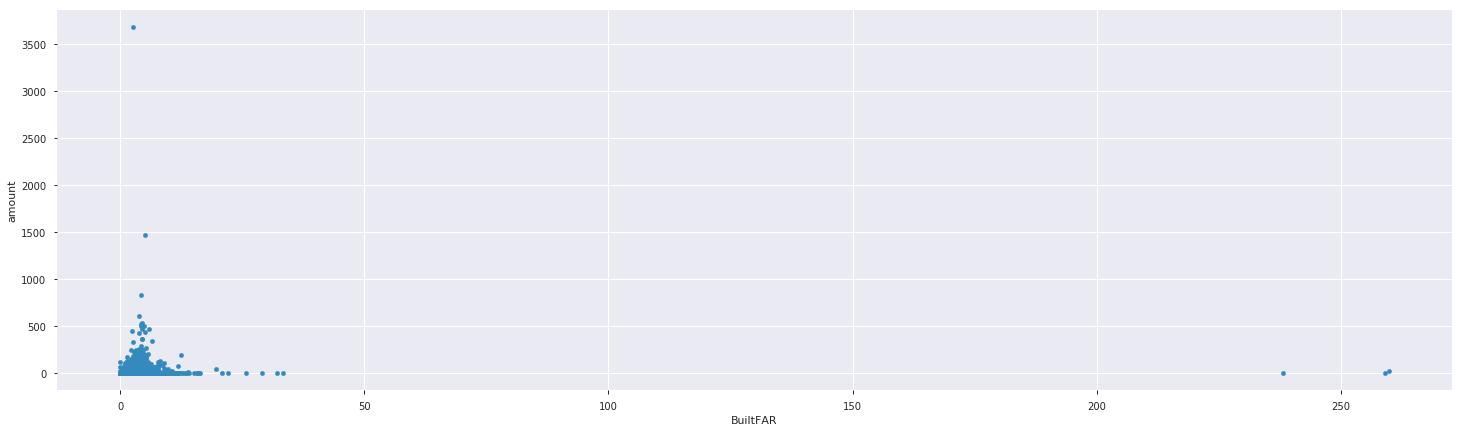

In [23]:
#Let's calculate the  Pearson and Spearman Correlation Coefficients and P-value of 'Building Floor Area Ration' and 'amount of complaints'. 
pearson_coef, p_value = stats.pearsonr(left_merge['BuiltFAR'], left_merge['amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

corr, p_value2 = spearmanr(left_merge['BuiltFAR'], left_merge['amount'])
print ("The Spearman Correlation Coefficient is",corr," with a P-value of P =", p_value2 )

#df_grp_BldgDepth.info()
left_merge.plot(kind='scatter',x='BuiltFAR',y='amount',figsize=(25,7))

Let's investigate the relationship between the Building Area and the amount of complaints

The Pearson Correlation Coefficient is 0.07040078362408096  with a P-value of P = 5.828380434928035e-100
The Spearman Correlation Coefficient is 0.4006821826500235  with a P-value of P = 0.0


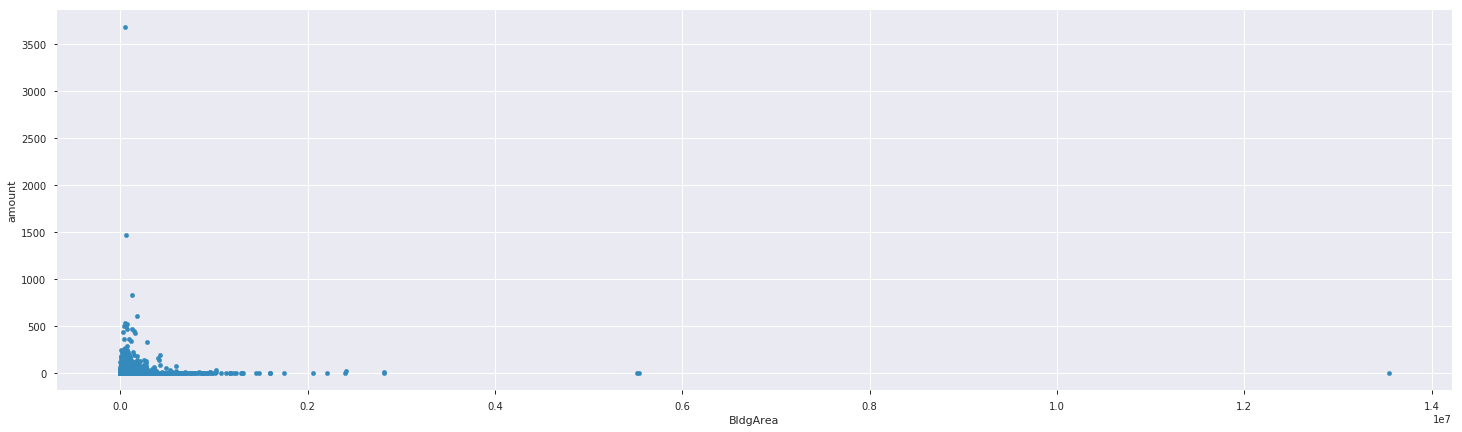

In [24]:
#Let's calculate the  Pearson and Spearman Correlation Coefficients and P-value of 'Building Area' and 'amount of complaints'. 
pearson_coef, p_value = stats.pearsonr(left_merge['BldgArea'], left_merge['amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

corr, p_value2 = spearmanr(left_merge['BldgArea'], left_merge['amount'])
print ("The Spearman Correlation Coefficient is",corr," with a P-value of P =", p_value2 )

#df_grp_BldgDepth.info()
left_merge.plot(kind='scatter',x='BldgArea',y='amount',figsize=(25,7))

Let's investigate the relationship between the Number of Floors and the amount of complaints

The Pearson Correlation Coefficient is 0.21648629736120883  with a P-value of P = 0.0
The Spearman Correlation Coefficient is 0.41101518407155774  with a P-value of P = 0.0


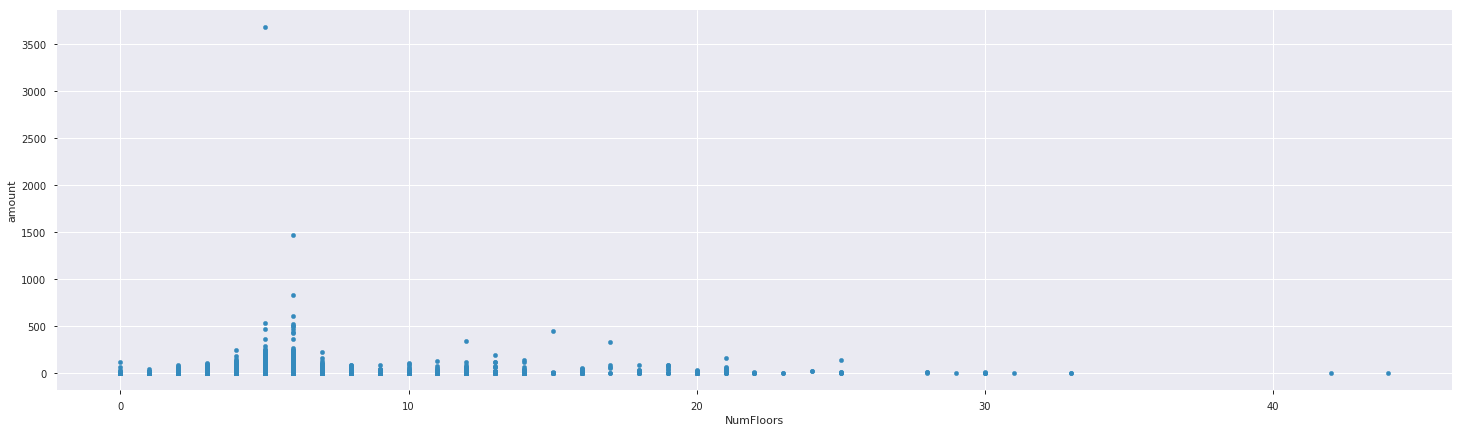

In [25]:
#Let's calculate the  Pearson Correlation Coefficient and P-value of 'number of Floors' and 'amount of complaints'. 
pearson_coef, p_value = stats.pearsonr(left_merge['NumFloors'], left_merge['amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

corr, p_value2 = spearmanr(left_merge['NumFloors'], left_merge['amount'])
print ("The Spearman Correlation Coefficient is",corr," with a P-value of P =", p_value2 )

#df_grp_BldgDepth.info()
left_merge.plot(kind='scatter',x='NumFloors',y='amount',figsize=(25,7))

Let's investigate the relationship between the Building Depth and the amount of complaints

The Pearson Correlation Coefficient is 0.026797255495878598  with a P-value of P = 0.037623607832009916
The Spearman Correlation Coefficient is 0.45918026676113805  with a P-value of P = 0.0


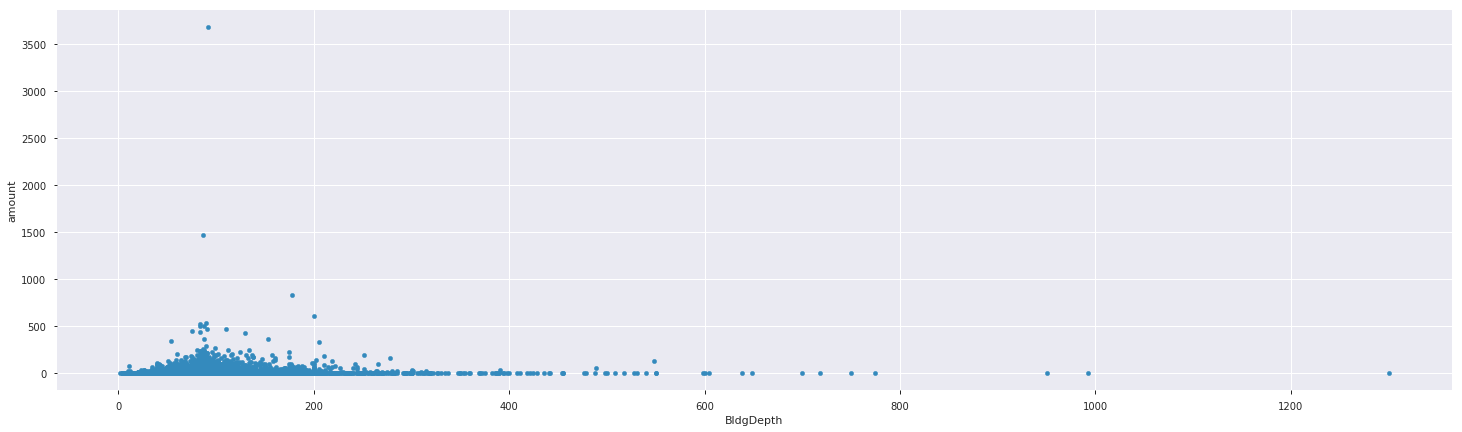

In [26]:
df_grp_BldgDepth=left_merge.groupby(['BldgDepth','amount'],as_index=False).mean()
df_grp_BldgDepth.head()
#we drop rows that contain 0 or negative values
df_grp_BldgDepth= df_grp_BldgDepth[df_grp_BldgDepth['BldgDepth']>0]

#Let's calculate the Pearson Correlation Coefficient and P-value of 'Building Depth' and 'amount of complaints'. 
pearson_coef, p_value = stats.pearsonr(df_grp_BldgDepth['BldgArea'], df_grp_BldgDepth['amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#Let's calculate the  Spearman Correlation Coefficient and P-value of 'Building Depth' and 'amount of complaints'. 
corr, p_value2 = spearmanr(df_grp_BldgDepth['BldgArea'], df_grp_BldgDepth['amount'])
print ("The Spearman Correlation Coefficient is",corr," with a P-value of P =", p_value2 )

#df_grp_BldgDepth.info()
df_grp_BldgDepth.plot(kind='scatter',x='BldgDepth',y='amount',figsize=(25,7))

Let's investigate the relationship between the Facility Floor Area Ratio and the amount of complaints

The Pearson Correlation Coefficient is 0.11727345007857692  with a P-value of P = 5.483511408372757e-275
The Spearman Correlation Coefficient is 0.2926150145495925  with a P-value of P = 0.0


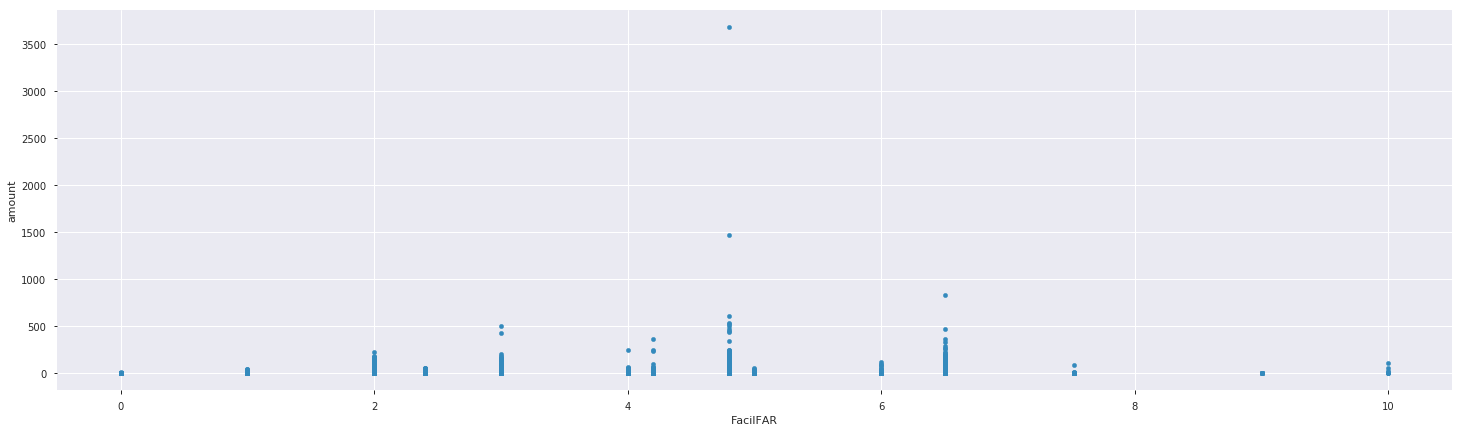

In [27]:
#Let's calculate the  Pearson Correlation Coefficient and P-value of 'Building Depth' and 'amount of complaints'. 
pearson_coef, p_value = stats.pearsonr(left_merge['FacilFAR'], left_merge['amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

corr, p_value2 = spearmanr(left_merge['FacilFAR'], left_merge['amount'])
print ("The Spearman Correlation Coefficient is",corr," with a P-value of P =", p_value2 )

#df_grp_BldgDepth.info()
left_merge.plot(kind='scatter',x='FacilFAR',y='amount',figsize=(25,7))

Let's now investigate weaker relationships, like for instance between the YearBuilt and the amount of complaints

The Pearson Correlation Coefficient is -0.08385890992588785  with a P-value of P = 8.383879101113925e-06
The Spearman Correlation Coefficient is -0.17162692283113049  with a P-value of P = 4.729701244305585e-20


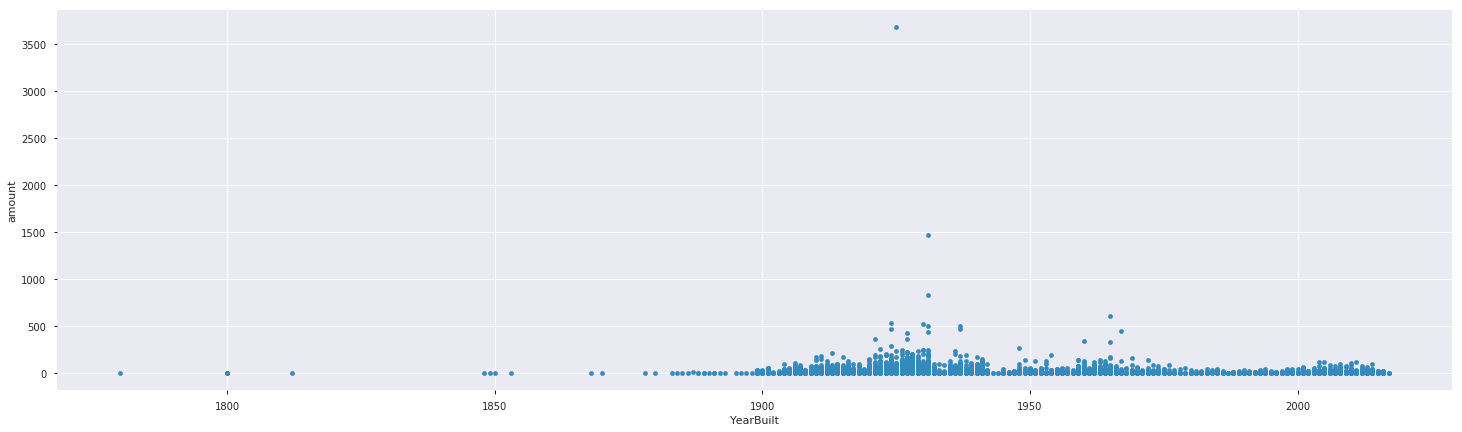

In [28]:
df_grp_year=left_merge.groupby(['YearBuilt','amount'],as_index=False).mean()
df_grp_year.head()
#we also notice that some complaints are filed more than one time. lets drop complaints that are duplicates
df_grp_year= df_grp_year[df_grp_year['YearBuilt']>0]

#Let's calculate the  Pearson Correlation Coefficient and P-value of 'Building Depth' and 'amount of complaints'. 
pearson_coef, p_value = stats.pearsonr(df_grp_year['YearBuilt'], df_grp_year['amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

corr, p_value2 = spearmanr(df_grp_year['YearBuilt'], df_grp_year['amount'])
print ("The Spearman Correlation Coefficient is",corr," with a P-value of P =", p_value2 )


#df_grp_year.info()
df_grp_year.plot(kind='scatter',x='YearBuilt',y='amount',figsize=(25,7))

## As we can see in all the plots above , although not linear, there is some kind of relationship between the variables studied and the amount of complaints. 
We can also see two clear outliers with 3500+ and 1500 complaints. 
Although they are not significant, since they are small in number compared with the size of the data set, let's remove them and compute again the correlation

In [29]:
left_merge.sort_values(by='amount',ascending=False,inplace=True)
left_merge.head()

Address  BldgArea            BldgDepth  \
24038   3810 BAILEY AVENUE     54001               92.000   
33349  1025 BOYNTON AVENUE     61500               87.000   
3982   888 GRAND CONCOURSE    122800              178.000   
47882  2074 WALLACE AVENUE    174400              200.000   
21822    30 BUCHANAN PLACE     45300               90.000   

                  BuiltFAR              CommFAR             FacilFAR  Lot  \
24038                2.530                0.000                4.800    7   
33349                4.990                0.000                4.800   54   
3982                 4.320                0.000                6.500   34   
47882                3.880                0.000                4.800    1   
21822                4.530                0.000                4.800   10   

       LotArea             LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  \
24038    21320              164.000         1          5           0    54000   
33349    12319              100.000         1          6           0    61500   
3982     28444              188.550         1          6        8000   111800   
47882    45000              200.000         1          6           0   174400   
21822    10000              100.000         1          5           0    45300   

                  ResidFAR  RetailArea  YearBuilt  YearAlter1  \
24038                3.440           0       1925           0   
33349                2.430           0       1931           0   
3982                 6.020        3000       1931           0   
47882                3.440           0       1965           0   
21822                3.440           0       1924        1995   

                       lat                  lng    zip  amount  \
24038               40.884              -73.898  10463    3681   
33349               40.825              -73.877  10472    1464   
3982                40.827              -73.923  10451     833   
47882               40.853              -73.865  10462     610   
21822               40.858              -73.906  10453     527   

                  av_delay  last_improvement  
24038               38.444              1925  
33349               29.378              1931  
3982                92.289              1931  
47882               53.484              1965  
21822               44.004              1995

In [30]:
left_merge.drop
modDf = left_merge.drop([left_merge.index[0] , left_merge.index[1]])
modDf.head()

Address  BldgArea            BldgDepth  \
3982   888 GRAND CONCOURSE    122800              178.000   
47882  2074 WALLACE AVENUE    174400              200.000   
21822    30 BUCHANAN PLACE     45300               90.000   
33355  1030 BOYNTON AVENUE     66456               84.000   
24887    2968 PERRY AVENUE     34320               88.000   

                  BuiltFAR              CommFAR             FacilFAR  Lot  \
3982                 4.320                0.000                6.500   34   
47882                3.880                0.000                4.800    1   
21822                4.530                0.000                4.800   10   
33355                4.180                0.000                4.800   17   
24887                4.800                0.000                3.000   19   

       LotArea             LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  \
3982     28444              188.550         1          6        8000   111800   
47882    45000              200.000         1          6           0   174400   
21822    10000              100.000         1          5           0    45300   
33355    15900              100.000         1          6           0    66456   
24887     7150              110.000         1          6           0    34320   

                  ResidFAR  RetailArea  YearBuilt  YearAlter1  \
3982                 6.020        3000       1931           0   
47882                3.440           0       1965           0   
21822                3.440           0       1924        1995   
33355                2.430           0       1930        1988   
24887                3.000           0       1931           0   

                       lat                  lng    zip  amount  \
3982                40.827              -73.923  10451     833   
47882               40.853              -73.865  10462     610   
21822               40.858              -73.906  10453     527   
33355               40.825              -73.877  10472     520   
24887               40.870              -73.884  10458     503   

                  av_delay  last_improvement  
3982                92.289              1931  
47882               53.484              1965  
21822               44.004              1995  
33355               53.373              1988  
24887               48.151              1931

In [31]:
modDf.corr('spearman')

BldgArea            BldgDepth  \
BldgArea                        1.000                0.787   
BldgDepth                       0.787                1.000   
BuiltFAR                        0.764                0.651   
CommFAR                         0.072                0.078   
FacilFAR                        0.362                0.346   
Lot                            -0.040               -0.069   
LotArea                         0.365                0.275   
LotDepth                        0.136                0.168   
NumBldgs                        0.170                0.178   
NumFloors                       0.595                0.431   
OfficeArea                      0.191                0.168   
ResArea                         0.652                0.505   
ResidFAR                        0.350                0.324   
RetailArea                      0.277                0.264   
YearBuilt                       0.190                0.126   
YearAlter1                      0.279                0.239   
lat                            -0.068               -0.099   
lng                            -0.447               -0.368   
amount                          0.401                0.366   
av_delay                       -0.103               -0.089   
last_improvement                0.314                0.235   

                             BuiltFAR              CommFAR  \
BldgArea                        0.764                0.072   
BldgDepth                       0.651                0.078   
BuiltFAR                        1.000               -0.040   
CommFAR                        -0.040                1.000   
FacilFAR                        0.441                0.174   
Lot                            -0.053                0.006   
LotArea                        -0.153                0.174   
LotDepth                       -0.103                0.075   
NumBldgs                        0.031               -0.091   
NumFloors                       0.721               -0.169   
OfficeArea                      0.100                0.166   
ResArea                         0.637               -0.249   
ResidFAR                        0.476               -0.178   
RetailArea                      0.191                0.158   
YearBuilt                       0.208               -0.065   
YearAlter1                      0.187                0.110   
lat                            -0.125               -0.084   
lng                            -0.495               -0.090   
amount                          0.421               -0.039   
av_delay                       -0.094                0.026   
last_improvement                0.304               -0.023   

                             FacilFAR                  Lot  \
BldgArea                        0.362               -0.040   
BldgDepth                       0.346               -0.069   
BuiltFAR                        0.441               -0.053   
CommFAR                         0.174                0.006   
FacilFAR                        1.000               -0.075   
Lot                            -0.075                1.000   
LotArea                         0.010               -0.016   
LotDepth                       -0.005                0.029   
NumBldgs                       -0.111               -0.054   
NumFloors                       0.294               -0.008   
OfficeArea                      0.105               -0.037   
ResArea                         0.209                0.013   
ResidFAR                        0.810               -0.075   
RetailArea                      0.225               -0.069   
YearBuilt                      -0.101                0.094   
YearAlter1                      0.168               -0.042   
lat                            -0.284                0.058   
lng                            -0.680               -0.048   
amount                          0.293               -0.055   
av_delay                       -0.032                0.020 

After running Pearson and Spearman correlation functions we can see that there are a few characteristics linked to the amount of complaints, although their relationship is weak. The most important features of the building related to the amount of complaints are: Residential Area (0.43), Built Floor to Area Ratio (0.421), Building Area (0.401), Number of Floors (0.396) and Building Depth(0.366). 

Pearsons coeeficient are very low which indicates that there is no linear relationship. Spearman coefficients are more sigfinicant, indicative of phenomena which improve with repetition

Additional insight: We investigated a likely feature like when was the building last improved (maximum of the Year the building was built or in which it was altered) and found no relationship with the amount of complaints placed. Equally we found that the house features had no relationship with the delay to close complaints, something not evident, since one could thought that certain house characteristics, like the year it was build, or the number of floors, area dedicated to facilities, etc,... could have an influence in the complexity to solve a complaint.

# Let's now try with a Random Forest Approach to see if we can support the same findings

In [32]:
from sklearn.model_selection import train_test_split

data_cols =['BldgArea','BldgDepth','BuiltFAR','CommFAR','FacilFAR','Lot','LotArea','LotDepth','NumBldgs','NumFloors','OfficeArea','ResArea','ResidFAR','RetailArea','YearBuilt','YearAlter1']
target_cols = ['amount']

X = modDf[data_cols]
y = modDf.amount
X=X[::]
#let's add a random column to use as a cut out point for Feature importance
np.random.seed(seed = 42)
X['random'] = np.random.random(size = len(X))
data_cols=data_cols+['random']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy_score(y_test.values, y_predict)

0.8378865316027503

As we can see here, https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e, we will try different approaches to determine the Feature Importance of the set: 



### FIRST: Default Scikit-learn’s feature importances
Let’s start with decision trees to build some intuition

   Pros:fast calculation, easy to retrieve — one command
   
   Cons: biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables

In [34]:
features_dict = {}
#data_cols =['ResArea','BuiltFAR','BldgArea','NumFloors', 'BldgDepth','ResidFAR','FacilFAR','YearAlter1','random']
for i in range(len(model.feature_importances_)):
    features_dict[data_cols[i]] = model.feature_importances_[i]
sorted(features_dict.items(), key=lambda x:x[1], reverse=True)

[('ResArea', 0.13209095498013818),
 ('random', 0.12673610735260413),
 ('Lot', 0.10674160094106461),
 ('BuiltFAR', 0.10427025240311559),
 ('BldgArea', 0.0972577951984762),
 ('BldgDepth', 0.07522098034088713),
 ('LotArea', 0.07481666615917965),
 ('YearBuilt', 0.06406307213402374),
 ('LotDepth', 0.06102118233541185),
 ('NumFloors', 0.04923581771344182),
 ('ResidFAR', 0.03379078889670775),
 ('YearAlter1', 0.0214934663412407),
 ('FacilFAR', 0.017295018053501095),
 ('RetailArea', 0.014250639724308092),
 ('NumBldgs', 0.01143938272595362),
 ('OfficeArea', 0.005506451865750614),
 ('CommFAR', 0.004769822834195268)]

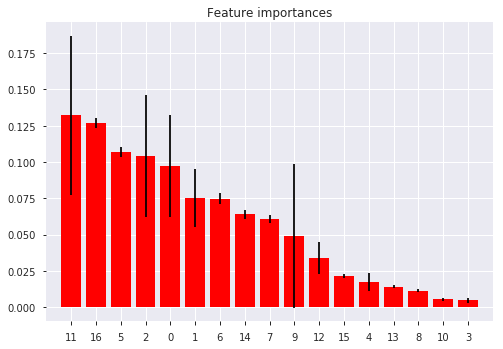

In [38]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances default sci-kit learn method")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

What seems surprising though is that a column of random values turned out to be more important than the rest of the features except ResArea. Intuitively the random feature should have zero importance on the target variable. We can see also how Number of Floors which has a los cardinality is penalized. Let’s see how it is evaluated by different approaches.

### SECOND: Let's now try Permutation approach. This approach directly measures feature importance by observing how random re-shuffling (thus preserving the distribution of the variable) of each predictor influences model performance.

   Pros:applicable to any model,reasonably efficient, reliable technique,no need to retrain the model at each modification of the dataset


   Cons:more computationally expensive than the default feature_importances,permutation importance overestimates the importance of correlated variables

In [35]:
!conda install -c conda-forge rfpimp 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - rfpimp


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    rfpimp-1.3.2               |             py_0          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    rfpimp:          1.3.2-py_0        conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-0                   --> 2019.6.16-hecc5488_0 conda-forge
    certifi:         2019.6.16-py36_1          

In [36]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(model, X_train, y_train, r2)
print(perm_imp_rfpimp)

                     Importance
Feature                        
BuiltFAR                  0.905
ResArea                   0.863
BldgArea                  0.807
NumFloors                 0.804
LotArea                   0.375
YearBuilt                 0.333
BldgDepth                 0.172
random                    0.092
Lot                       0.042
ResidFAR                  0.024
LotDepth                  0.019
FacilFAR                  0.012
NumBldgs                  0.002
RetailArea                0.001
YearAlter1                0.001
CommFAR                   0.000
OfficeArea                0.000


Here we can see how the features we identified before with the Spearman's correlation appear as the most important.

### THIRD: Drop Column feature importance.

There is a third approach which would be to investigate the importance of a feature by comparing a model with all features versus a model with this feature dropped for training.
Since it is potentially high computation cost due to retraining the model for each variant of the dataset (after dropping a single feature column) we will stick with the analysis doen with the three previous methods

All in all we can see how the same features appear regardless of the method, although their relative importance varies.

We deem the most sensible approach to keep the list that we obtained with the permutation method as the more balanced approach. If we run again the Random Tree with the list of more important features:



## CONCLUDING REMARKS: 

## After running Pearson and Spearman correlation functions we can see that there are a few characteristics linked to the amount of complaints, although their relationship one by one is weak. 

## The most important features of the building related to the amount of complaints are (Spearman's coeeff. in paretheses): 

## Residential Area (0.43), Built Floor to Area Ratio (0.421), Building Area (0.401), Number of Floors (0.396) and Building Depth(0.366). THESE RELATIONSHIPS ARE NOT LINEAR


# We also identified importance of the different house features by means of Random Forests :

## Built Floor Area Ratio, Residential Area, Building Area, Number of Floors, Lot Area, Year Built and Building Depth . 

## The model would have an accuracy score of around 0.83.  We see how this is constent with the Spearman's coefficients.


## Additional insight: We investigated  if there was a relationship between the date the building was last improved (maximum of the Year the building was built or in which it was altered) and found no relationship with the amount of complaints placed. Equally We also found that the delay to close complaints is not related to the house features
